In [1]:
# install feedparser module (if not already installed)
!pip install feedparser
import urllib, urllib.request, feedparser, time
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 81 kB 4.3 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=b23e963f6fa991acaddd1e5dc602d0dc9b5dd2c3b82e0c69bc3ad8a78152392f
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


In [14]:
import numpy as np


In [2]:
# Find Total number of results
url = 'http://export.arxiv.org/api/query?search_query=cat:cs.LG&start=0&max_results=1'
data = urllib.request.urlopen(url)
# print(data.read().decode('utf-8'))
feed = feedparser.parse(data)
print(feed.feed.opensearch_totalresults)

# Base API query URL 
base_url = 'http://export.arxiv.org/api/query?';

# Search parameters
search_query = 'cat:cs.LG'
start = 0                      
total_results = int(feed.feed.opensearch_totalresults)         
results_per_iteration = 5000   
wait_time = 5     

# Initialise empty arrays
titles = []
published_years = []
categories = []
authors = []
arxivid = []

print('Searching arXiv for %s' % search_query)

# Iterate through searches in batches 
for i in range(start,total_results,results_per_iteration):
    
    print("Results %i - %i" % (i,i+results_per_iteration))
    query = 'search_query=%s&start=%i&max_results=%i' % (search_query,i,results_per_iteration)

    # perform a GET request using the base_url and query
    response = urllib.request.urlopen(base_url+query).read()

    # parse the response using feedparser
    feed = feedparser.parse(response)

    # Run through each entry, and print out information
    for entry in feed.entries:
        
        # print(entry.tags)
        # print('arxiv-id: %s' % entry.id.split('/abs/')[-1])
        # print('Title:  %s' % entry.title)
        # print('Published: %s' % entry.published[:4])
        # print('First Author:  %s' % entry.author)

        all_categories = [t['term'] for t in entry.tags]
        # print ('All Categories: %s' % (', ').join(all_categories))
 
        titles.append(entry.title)
        published_years.append(entry.published[:4])
        categories.append(all_categories)
        authors.append(entry.author)
        arxivid.append(entry.id.split('/abs/')[-1])

    # Remember to play nice and sleep a bit before you call
    # the api again!
    print('Sleeping for %i seconds' % wait_time) 
    time.sleep(wait_time)

102994
Searching arXiv for cat:cs.LG
Results 0 - 5000
Sleeping for 5 seconds
Results 5000 - 10000
Sleeping for 5 seconds
Results 10000 - 15000
Sleeping for 5 seconds
Results 15000 - 20000
Sleeping for 5 seconds
Results 20000 - 25000
Sleeping for 5 seconds
Results 25000 - 30000
Sleeping for 5 seconds
Results 30000 - 35000
Sleeping for 5 seconds
Results 35000 - 40000
Sleeping for 5 seconds
Results 40000 - 45000
Sleeping for 5 seconds
Results 45000 - 50000
Sleeping for 5 seconds
Results 50000 - 55000
Sleeping for 5 seconds
Results 55000 - 60000
Sleeping for 5 seconds
Results 60000 - 65000
Sleeping for 5 seconds
Results 65000 - 70000
Sleeping for 5 seconds
Results 70000 - 75000
Sleeping for 5 seconds
Results 75000 - 80000
Sleeping for 5 seconds
Results 80000 - 85000
Sleeping for 5 seconds
Results 85000 - 90000
Sleeping for 5 seconds
Results 90000 - 95000
Sleeping for 5 seconds
Results 95000 - 100000
Sleeping for 5 seconds
Results 100000 - 105000
Sleeping for 5 seconds


In [7]:
df = pd.DataFrame(list(zip(titles, categories)),
               columns =['Title',  'Categories'])

df
# df['Categories'] = sorted(df['Categories'])

,Title,Categories
0,Hierarchical Reinforcement Learning with the M...,"[cs.LG, I.2.6]"
1,State Abstraction in MAXQ Hierarchical Reinfor...,"[cs.LG, I.2.6]"
2,Multiplicative Algorithm for Orthgonal Groups ...,"[cs.LG, G.1.6]"
3,Multiplicative Nonholonomic/Newton -like Algor...,"[cs.LG, G.1.6]"
4,Complexity analysis for algorithmically simple...,"[cs.LG, E.4; F.2; I.2]"
...,...,...
35964,Federated Learning for Big Data: A Survey on O...,"[cs.LG, cs.AI]"
35965,Iterative Decoding for Compositional Generaliz...,"[cs.LG, cs.CL]"
35966,TopoDetect: Framework for Topological Features...,"[cs.LG, cs.AI]"
35967,Dataset Condensation with Distribution Matching,"[cs.LG, cs.CV]"


In [9]:
# export to csv
df.to_csv('arXivExport1.csv')

In [ ]:

# read from saved csv
df = pd.read_csv("arXivExport1.csv")

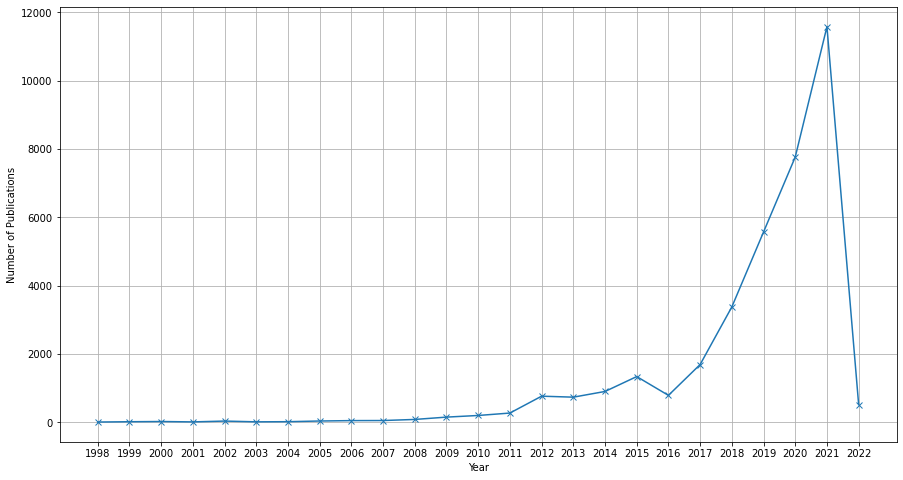

In [18]:
frequency = df.groupby(published_years).count()['Title']
plt.figure(figsize=(15,8))
# plt.hist(df['Year Published'], bins=np.arange(df['Year Published'].min(), df['Year Published'].max())) # alternatively df.hist['Year Published']
plt.plot(frequency, 'x-')
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.grid();
# plt.xticks(np.arange(df[published_years].min(), df[published_years].max()+1), rotation=45);

# Fit data using scipy and extrapolate

In [90]:
from scipy.optimize import curve_fit
years = np.arange(1998, 2022, 1)
frequency_acc = frequency[ 0:-1].to_numpy()
def objective(x, a, b, c, d):
	return a*np.exp(b*(x-c))+d
popt, pcov = curve_fit(objective, years, frequency_acc, p0=(1, 1e-3, 1998, 0))
a, b, c, d = popt
print('y = %.5f * e ^ (%.5f (x - %.5f) + %.5f' % (a, b, c, d))

y = 0.00000 * e ^ (0.41813 x) + 1952.49313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


This time series analysis predicts 17722 papers in the field of Machine learning in 2022


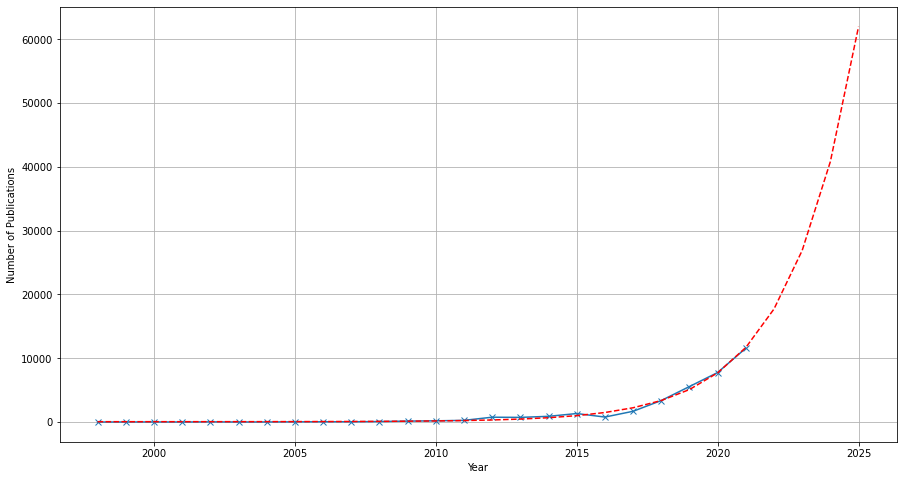

In [100]:
plt.figure(figsize=(15,8))
plt.plot(years, frequency_acc, 'x-')

x_line = np.arange(min(years), max(years)+5, 1)
y_line = objective(x_line, a, b, c, d)

plt.plot(x_line, y_line, '--', color='red')

plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.grid();

print('This time series analysis predicts %.0f papers in the field of Machine learning in 2022' % (y_line[24]))


Exponential nature suggests influence of Moore's Law - increased transistor technology results in higher computing power which improves the efficiency of Machine learning techniques and hence their utility.

In [106]:
print(titles[3])

Multiplicative Nonholonomic/Newton -like Algorithm
